#  Artificial Neural Networks (ANN) Study Notebook
This notebook covers:
- Why we need ANN
- Architecture
- Logic gates using neurons
- Mathematical model of backpropagation
- Python implementations

## 1. Why ANN When We Already Have ML Algorithms?
Traditional ML algorithms work well on structured data, but fail on complex, unstructured data like images, audio, and text. ANN automatically extracts features and handles high-dimensional input. It's particularly powerful for tasks where rules are hard to define manually.

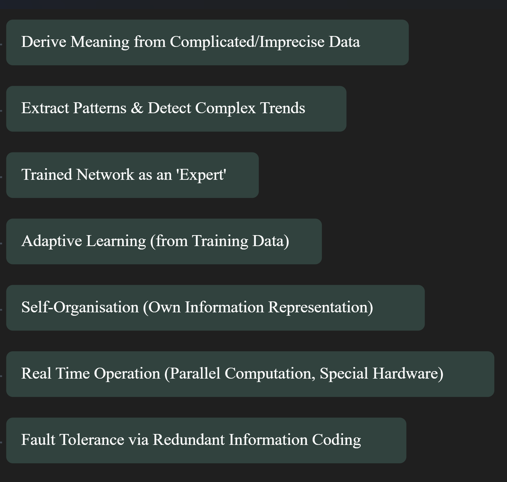

## 2. Architecture of ANN

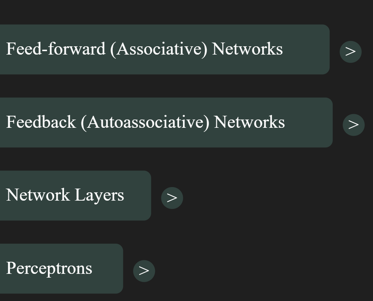
https://images.prismic.io/turing/65980b1a531ac2845a272610_Artificial_neural_network_7f534b7485.webp?auto=format,compress
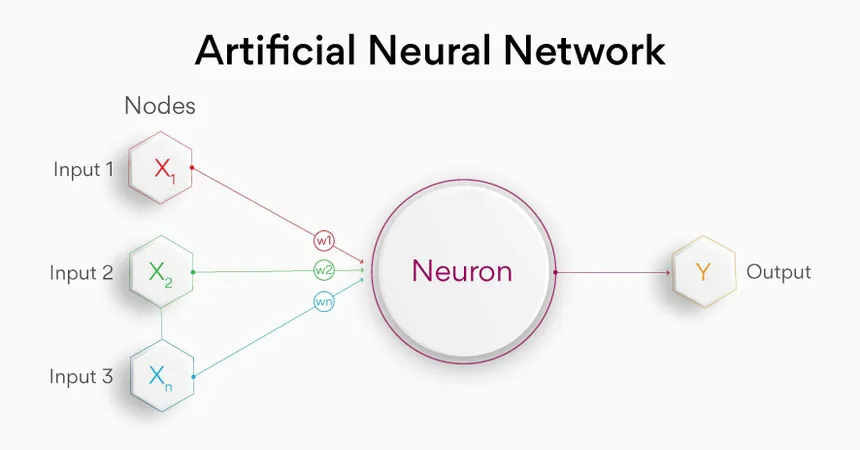

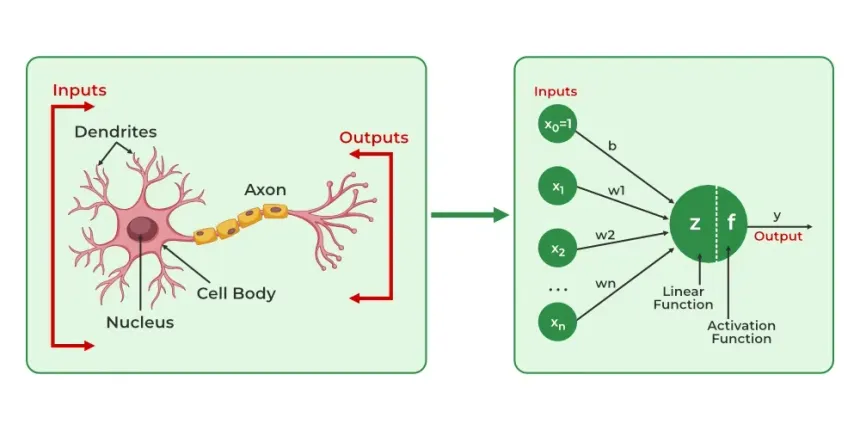

Each neuron computes:
\[ Y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b \]
\[ a = \phi(z) \]

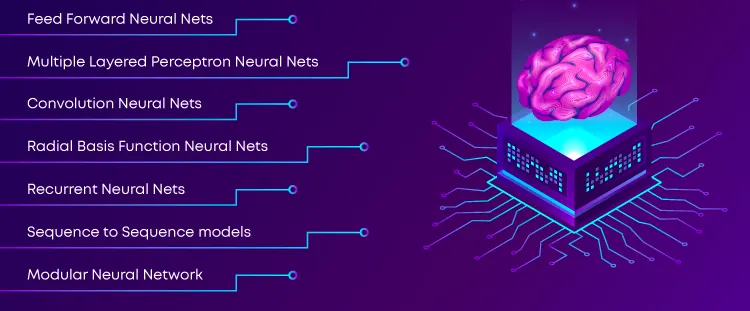
https://media.licdn.com/dms/image/D4D12AQEtGpLe_ZzRQg/article-cover_image-shrink_600_2000/0/1694957119313?e=2147483647&v=beta&t=upr0jnGTQORfiKZRLKp_FXsi0ksTs2bhSFAfA5sQhXs

## 3. Implementing Logic Gates using Neurons
### AND Gate using a single-layer perceptron

In [ ]:
# Define the step activation and perceptron
def step(x):
    return 1 if x >= 0 else 0

def perceptron(x1, x2, w1, w2, bias):
    return step(x1 * w1 + x2 * w2 + bias)

# Define logic gate functions
def not_gate(x):
    return step(-x + 0.5)

# Use perceptrons for gates
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Evaluate all gates
results = {
    "AND": [perceptron(x[0], x[1], 1, 1, -1.5) for x in inputs],
    "OR": [perceptron(x[0], x[1], 1, 1, -0.5) for x in inputs],
    "NAND": [perceptron(x[0], x[1], -1, -1, 1.5) for x in inputs],
    "NOR": [perceptron(x[0], x[1], -1, -1, 0.5) for x in inputs],
    "NOT x1": [not_gate(x[0]) for x in inputs],
    "NOT x2": [not_gate(x[1]) for x in inputs],
    "XNOR (manually built from logic)": [  # using AND of NOR and AND
        perceptron(
            perceptron(x[0], x[1], -1, -1, 0.5),  # NOR(x1, x2)
            perceptron(x[0], x[1], 1, 1, -1.5),   # AND(x1, x2)
            1, 1, -1.5
        )
        for x in inputs
    ]
}

results


{'AND': [0, 0, 0, 1],
 'OR': [0, 1, 1, 1],
 'NAND': [1, 1, 1, 0],
 'NOR': [1, 0, 0, 0],
 'NOT x1': [1, 1, 0, 0],
 'NOT x2': [1, 0, 1, 0],
 'XNOR (manually built from logic)': [0, 0, 0, 0]}

### XOR Gate

In [ ]:
def XOR_nn(x1, x2):
    # First layer (hidden layer)
    out1 = perceptron(x1, x2, 1, 1, -0.5)   # OR gate
    out2 = perceptron(x1, x2, -1, -1, 1.5)  # NAND gate

    # Second layer (output)
    return perceptron(out1, out2, 1, 1, -1.5)  # AND gate

print("XOR Gate (using multi-layer perceptron):")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"{x} -> {XOR_nn(x[0], x[1])}")


XOR Gate (using multi-layer perceptron):
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


## 4. Backpropagation Algorithm (Math Model)
Given loss function:
\[ L = \frac{1}{2}(y - \hat{y})^2 \]

Gradient update for weights:
\[ w = w - \eta \frac{\partial L}{\partial w} \]

Where:
- \( \eta \): learning rate
- Forward pass: compute activations
- Backward pass: compute gradients and update weights

![](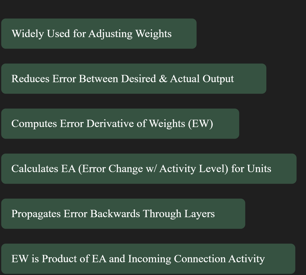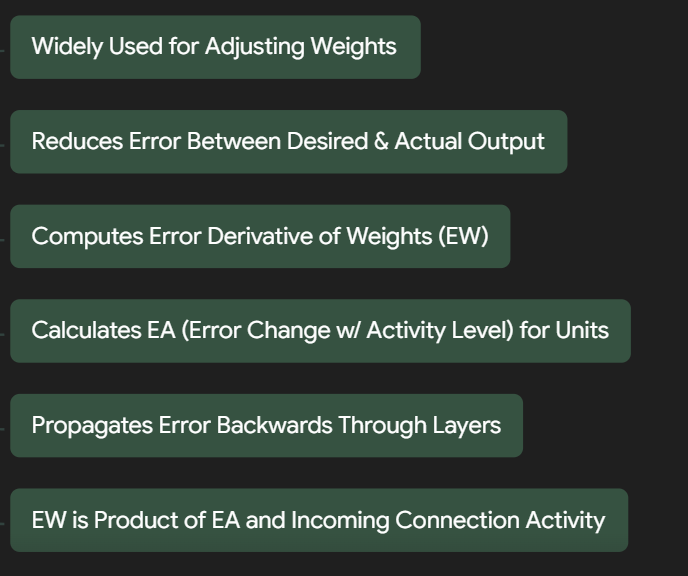)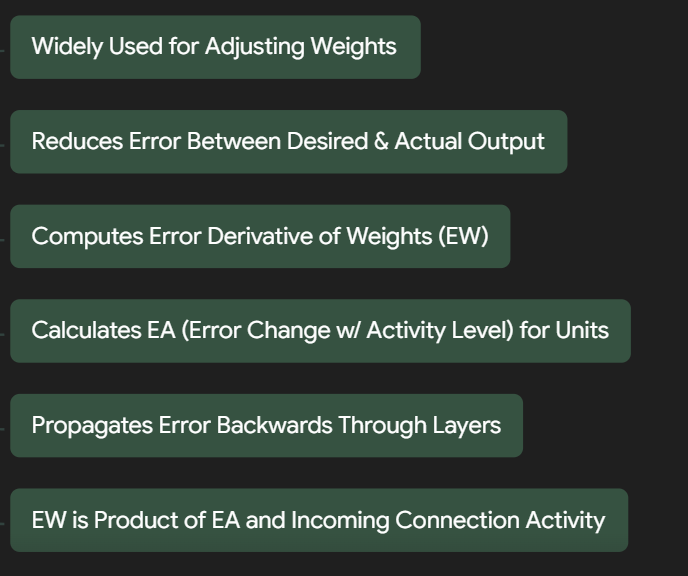



##  **What is Backpropagation?**

Backpropagation is a method used in training neural networks where the model learns from **mistakes** by updating its **weights** to reduce **error**.

It's like this:

* You give the network some input.
* It gives an output (a guess).
* You compare it to the correct answer (ground truth).
* You calculate **how wrong** it was.
* Then — like a teacher — you **correct it gently**, layer by layer, from output back to input.

Hence: **Back** propagation.

---

##  Step-by-Step Explanation

### Step 1: **Forward Pass**

We pass the input through the network and calculate the predicted output using current weights.

### Step 2: **Calculate Error**

Compare the predicted output with the actual output using a **loss function**.

* For example, use **Mean Squared Error (MSE)**:

$$
\text{Error} = \frac{1}{2}(y_{\text{true}} - y_{\text{pred}})^2
$$

---

### Step 3: **Backpropagation**


####  A. Compute Gradient

We calculate **how much each weight contributed to the error** using calculus (derivatives). This is the “slope” telling us which direction to move weights in.

####  B. Update Weights

Use **Gradient Descent** to update weights:

$$
\text{New Weight} = \text{Old Weight} - \eta \cdot \frac{\partial E}{\partial w}
$$

Where:

* $\eta$ = learning rate (how fast we learn)
* $\frac{\partial E}{\partial w}$ = how error changes w\.r.t. weight

---

##  Math

Assume:

* Input: $x$
* Hidden output: $h = \sigma(wx + b)$
* Final output: $\hat{y} = \sigma(wh \cdot h + bh)$
* Loss: $L = \frac{1}{2}(y - \hat{y})^2$

### Derivatives:

* Compute $\frac{\partial L}{\partial \hat{y}}$
* Then backtrack using chain rule:

  * $\frac{\partial L}{\partial wh}$
  * $\frac{\partial L}{\partial w}$

You are basically **propagating the error backwards** to assign blame and adjust accordingly.

---

##  Repeat Until:

* Loss becomes small
* Or accuracy becomes acceptable


References:


https://studymafia.org/wp-content/uploads/2015/03/CSE-Artificial-Neural-Networks-report.pdf

https://statquest.org/neural-networks-part-2-backpropagation-main-ideas/

https://www.youtube.com/watch?v=FaHHWdsIYQg

tensor is a multidimensional array

In [ ]:
 # In[3]:
 def model(t_u, w, b):
    return w * t_u + b

In [ ]:
 # In[4]:
 def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
 # In[5]:
 w = torch.ones(1)
 b = torch.zeros(1)
 t_p = model(t_u, w, b)
 t_p
 # Out[5]:
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
  48.4000, 60.4000, 68.4000])

In [ ]:
 # In[6]:
 loss = loss_fn(t_p, t_c)
 loss
 # Out[6]:
 tensor(1763.8846)

NameError: name 't_p' is not defined